In [1]:
import numpy as np
import seaborn as sns
import datetime as dt
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas_datareader.data as web
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Save Model Using Pickle
from pickle import dump
from pickle import load


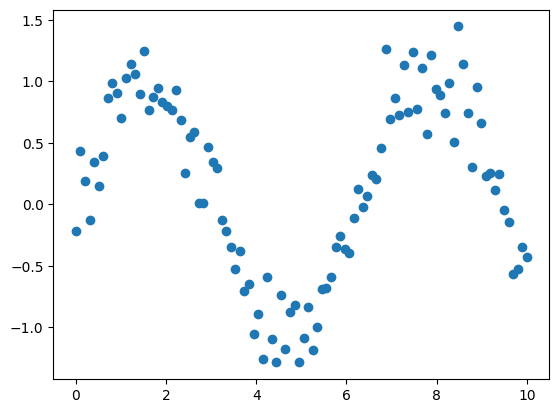

In [2]:
def create_dataset(n):
    x = np.linspace(0, 10, n)
    y = np.sin(x) + np.random.randn(n) * 0.2
    return x, y

X,Y = create_dataset(100)
plt.scatter(X,Y)

In [3]:
import yfinance as yf

start = dt.datetime(2018, 1, 1)
end = dt.datetime(2022, 3, 28)

tickers = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOG']
stk_data = yf.download(tickers, start, end)
# Select only the 'Close' prices
close_data = stk_data['Close']

ccy_tickers = ['DEXJPUS','DEXUSUK']
idx_tickers = ['SP500','DJIA','VIXCLS']
ccy_data = web.DataReader(ccy_tickers,'fred',start,end)
idx_data = web.DataReader(idx_tickers,'fred',start,end)

[*********************100%%**********************]  5 of 5 completed


In [4]:
X_merged = stk_data['Adj Close'].merge(ccy_data, how='inner', left_index=True, right_index=True)
X_data = X_merged.merge(idx_data, how='inner', left_index=True, right_index=True)
X_data.head()

,AAPL,AMZN,GOOG,MSFT,TSLA,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS
2018-01-02,40.722874,59.450500,53.250000,80.229019,21.368668,112.18,1.3596,2695.81,24824.01,9.77
2018-01-03,40.715771,60.209999,54.124001,80.602371,21.150000,112.28,1.3522,2713.06,24922.68,9.15
2018-01-04,40.904903,60.479500,54.320000,81.311790,20.974667,112.78,1.3539,2723.99,25075.13,9.22
2018-01-05,41.370625,61.457001,55.111500,82.319901,21.105333,113.18,1.3562,2743.15,25295.87,9.22
2018-01-08,41.216961,62.343498,55.347000,82.403908,22.427334,113.08,1.3566,2747.71,25283.00,9.52


In [5]:
X_data.describe()

,AAPL,AMZN,GOOG,MSFT,TSLA,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1051.000000,1051.000000,1066.000000,1066.000000,1066.000000
mean,86.581224,120.173869,81.782134,176.190945,110.447985,109.388173,1.319345,3351.690244,28453.509972,20.546801
std,43.655200,37.674653,31.769152,74.590513,113.330625,3.056295,0.054296,675.362892,4056.873509,8.813250
min,34.118885,59.450500,48.811001,79.351585,11.931333,102.520000,1.149200,2237.400000,18591.930000,9.150000
25%,47.028808,88.037624,57.323376,105.832663,20.210833,107.275000,1.283450,2806.867500,25402.820000,14.880000
50%,69.337917,99.386250,67.125999,156.306900,36.460667,109.330000,1.314000,3070.765000,26862.235000,18.310000
75%,125.631668,160.045753,103.533125,231.438076,217.778336,111.180000,1.364850,3913.752500,31825.165000,23.350000
max,179.953903,186.570496,150.709000,336.937256,409.970001,122.080000,1.433200,4796.560000,36799.650000,82.690000


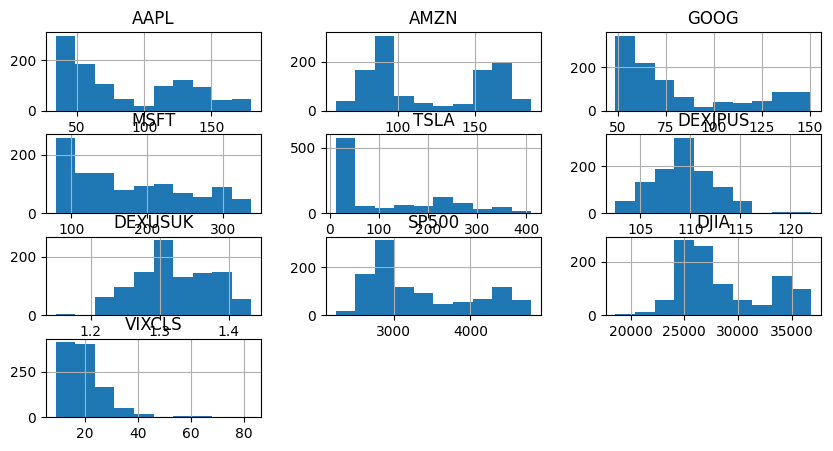

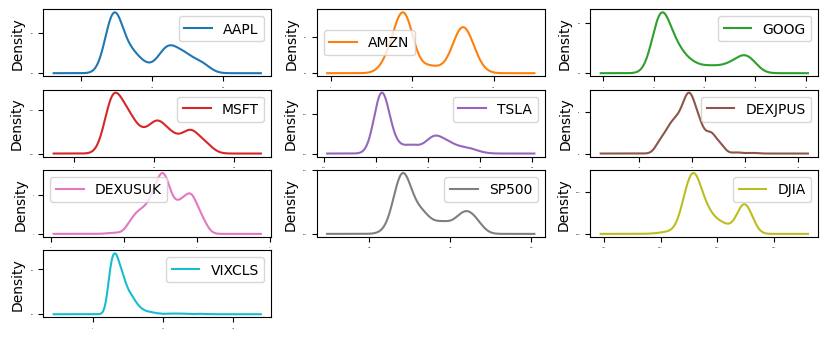

In [6]:
X_data.hist(sharex=False, sharey=False, layout=(4,3), figsize=(10,5))
plt.title('Histogram')
plt.show()

X_data.plot(kind='density', subplots=True, layout=(4,3), sharex=False, legend=True, fontsize=1, figsize=(10,4))
plt.title('Density')
plt.show()


<Axes: title={'center': 'Correlation Matrix'}>

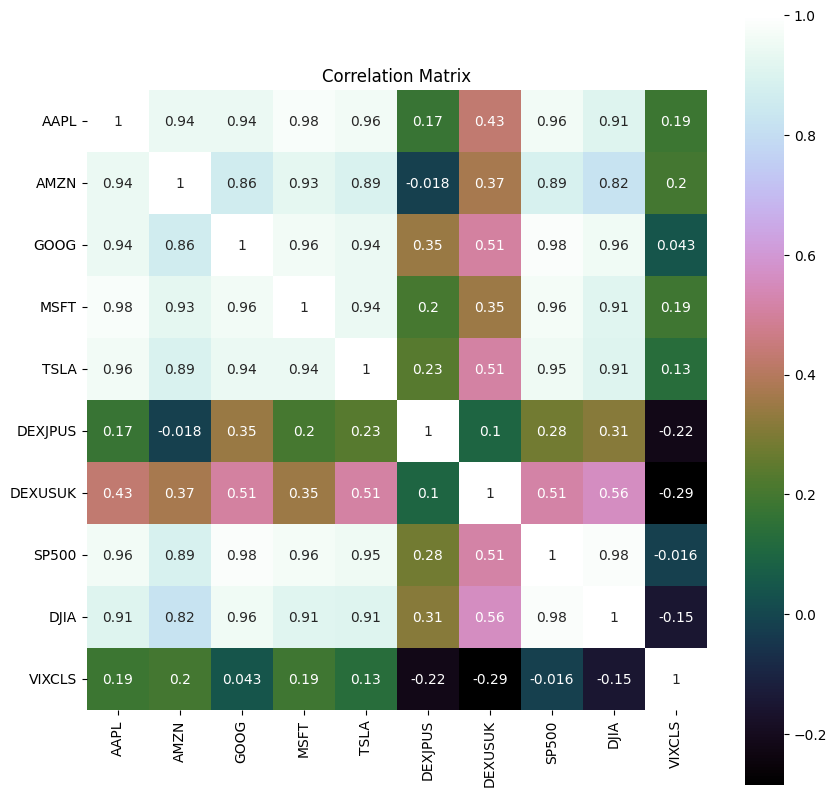

In [7]:
correlation = X_data.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

array([[<Axes: xlabel='AAPL', ylabel='AAPL'>,
        <Axes: xlabel='AMZN', ylabel='AAPL'>,
        <Axes: xlabel='GOOG', ylabel='AAPL'>,
        <Axes: xlabel='MSFT', ylabel='AAPL'>,
        <Axes: xlabel='TSLA', ylabel='AAPL'>,
        <Axes: xlabel='DEXJPUS', ylabel='AAPL'>,
        <Axes: xlabel='DEXUSUK', ylabel='AAPL'>,
        <Axes: xlabel='SP500', ylabel='AAPL'>,
        <Axes: xlabel='DJIA', ylabel='AAPL'>,
        <Axes: xlabel='VIXCLS', ylabel='AAPL'>],
       [<Axes: xlabel='AAPL', ylabel='AMZN'>,
        <Axes: xlabel='AMZN', ylabel='AMZN'>,
        <Axes: xlabel='GOOG', ylabel='AMZN'>,
        <Axes: xlabel='MSFT', ylabel='AMZN'>,
        <Axes: xlabel='TSLA', ylabel='AMZN'>,
        <Axes: xlabel='DEXJPUS', ylabel='AMZN'>,
        <Axes: xlabel='DEXUSUK', ylabel='AMZN'>,
        <Axes: xlabel='SP500', ylabel='AMZN'>,
        <Axes: xlabel='DJIA', ylabel='AMZN'>,
        <Axes: xlabel='VIXCLS', ylabel='AMZN'>],
       [<Axes: xlabel='AAPL', ylabel='GOOG'>,
        <Axes:

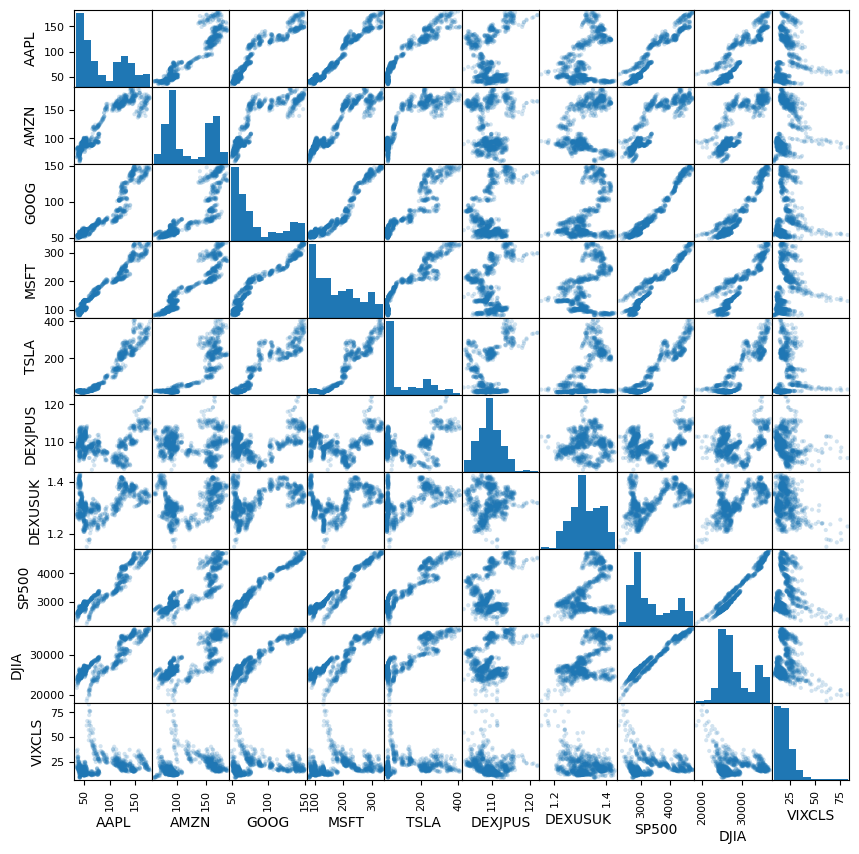

In [8]:
scatter_matrix(X_data, alpha=0.2, figsize=(10, 10))

In [9]:
X_data.isnull().sum()

AAPL        0
AMZN        0
GOOG        0
MSFT        0
TSLA        0
DEXJPUS    15
DEXUSUK    15
SP500       0
DJIA        0
VIXCLS      0
dtype: int64

In [10]:
#option 1: Dropping "NA"
X_data.dropna(axis=0)

#option 2: Filling "NA" with 0
X_data.fillna(0)

#option 3: Filling "NA" with the mean value
X_data['DEXJPUS'] = X_data['DEXJPUS'].fillna(X_data['DEXJPUS'].mean())
X_data['DEXUSUK'] = X_data['DEXUSUK'].fillna(X_data['DEXUSUK'].mean())


<h2>rescaled</h2>

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X_data))
rescaledX.columns = X_data.columns + '_res'
rescaledX.head()

,AAPL_res,AMZN_res,GOOG_res,MSFT_res,TSLA_res,DEXJPUS_res,DEXUSUK_res,SP500_res,DJIA_res,VIXCLS_res
0,0.045284,0.000000,0.043563,0.003406,0.023710,0.493865,0.740845,0.179125,0.342277,0.008431
1,0.045235,0.005975,0.052140,0.004856,0.023160,0.498978,0.714789,0.185866,0.347696,0.000000
2,0.046532,0.008095,0.054064,0.007610,0.022720,0.524540,0.720775,0.190137,0.356069,0.000952
3,0.049726,0.015784,0.061831,0.011524,0.023048,0.544990,0.728873,0.197623,0.368192,0.000952
4,0.048672,0.022758,0.064143,0.011850,0.026369,0.539877,0.730282,0.199405,0.367485,0.005031


<h2>standardised</h2>

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_data)
StandardisedX = pd.DataFrame(scaler.fit_transform(X_data))
StandardisedX.columns = X_data.columns + '_std'
StandardisedX.head()


,AAPL_std,AMZN_std,GOOG_std,MSFT_std,TSLA_std,DEXJPUS_std,DEXUSUK_std,SP500_std,DJIA_std,VIXCLS_std
0,-1.050960,-1.612540,-0.898530,-1.287120,-0.786382,0.920401,0.747020,-0.971608,-0.895074,-1.223369
1,-1.051123,-1.592371,-0.871006,-1.282113,-0.788312,0.953369,0.609696,-0.946054,-0.870741,-1.293751
2,-1.046788,-1.585214,-0.864833,-1.272597,-0.789860,1.118207,0.641243,-0.929863,-0.833145,-1.285805
3,-1.036115,-1.559256,-0.839908,-1.259076,-0.788706,1.250078,0.683925,-0.901480,-0.778709,-1.285805
4,-1.039637,-1.535715,-0.832491,-1.257949,-0.777036,1.217111,0.691348,-0.894725,-0.781882,-1.251749


<h2>normalisation</h2>

In [13]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_data)
NormalizedX = pd.DataFrame(scaler.fit_transform(X_data))
NormalizedX.columns = X_data.columns + '_norm'
NormalizedX.head()


,AAPL_norm,AMZN_norm,GOOG_norm,MSFT_norm,TSLA_norm,DEXJPUS_norm,DEXUSUK_norm,SP500_norm,DJIA_norm,VIXCLS_norm
0,0.001631,0.002381,0.002133,0.003213,0.000856,0.004492,0.000054,0.107960,0.994133,0.000391
1,0.001624,0.002402,0.002159,0.003215,0.000844,0.004479,0.000054,0.108217,0.994105,0.000365
2,0.001622,0.002398,0.002154,0.003224,0.000832,0.004471,0.000054,0.107995,0.994129,0.000366
3,0.001626,0.002415,0.002166,0.003235,0.000829,0.004448,0.000053,0.107808,0.994149,0.000362
4,0.001621,0.002451,0.002176,0.003240,0.000882,0.004446,0.000053,0.108040,0.994124,0.000374


<h2>evaluate</h2>

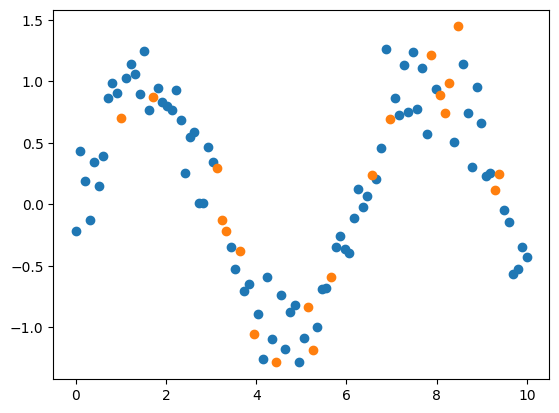

In [14]:
# split out validation dataset for the end
validation_size = 0.2
seed = 1

# transforming the data to include another axis
X = X[:, np.newaxis]
Y = Y[:, np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

plt.scatter(X_train, Y_train)
plt.scatter(X_test, Y_test)


<h2>compare models</h2>

In [15]:
# first test Linear Regression
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)
rmse_lin = np.sqrt(mean_squared_error(Y_train, Y_pred))
r2_lin = r2_score(Y_train, Y_pred)
print("RMSE for Linear Regression:", rmse_lin)

# second test Polynomial Fit
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
Y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(Y_train, Y_poly_pred))
r2 = r2_score(Y_train, Y_poly_pred)
print("RMSE for Polynomial Regression:", rmse)


RMSE for Linear Regression: 0.704832317547639
RMSE for Polynomial Regression: 0.6642574967164461


Text(0.5, 0.98, 'Algorithm Comparison')

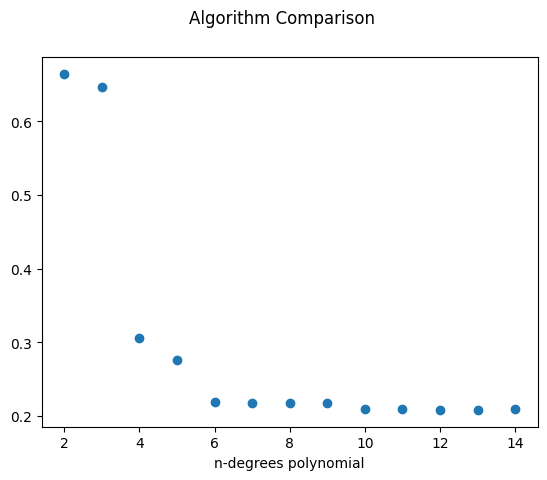

In [17]:
Deg = range(2,15)
results = []
names = []

for deg in Deg:
    polynomial_features = PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly, Y_train)
    Y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(Y_train, Y_poly_pred))
    r2 = r2_score(Y_train, Y_poly_pred)
    results.append(rmse)
    names.append(deg)

plt.plot(names, results, 'o')
plt.xlabel('n-degrees polynomial')
plt.suptitle('Algorithm Comparison')


<h2>model tuning</h2>    

Text(0.5, 0.98, 'Algorithm Comparison')

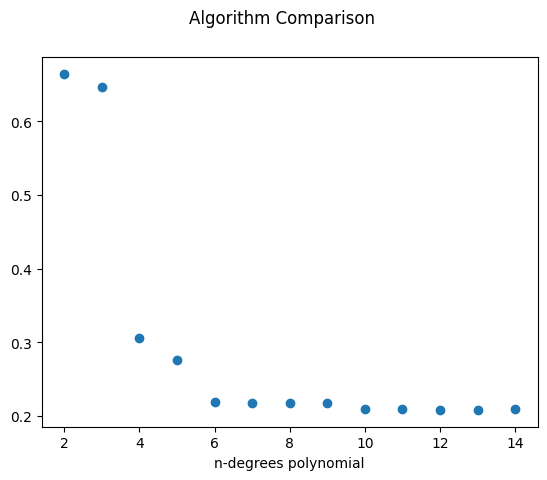

In [18]:
Deg = range(2, 15)
results = []
names = []

for deg in Deg:
    polynomial_features = PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly, Y_train)
    Y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(Y_train, Y_poly_pred))
    r2 = r2_score(Y_train, Y_poly_pred)
    results.append(rmse)
    names.append(deg)

plt.plot(names, results, 'o')
plt.xlabel('n-degrees polynomial')
plt.suptitle('Algorithm Comparison')


In [19]:
res_dict = {name: res for name, res in zip(names, results)}
for name, res in res_dict.items():
    print("deg: {0} RMSE: {1}".format(name, res))

print("\nThe n-deg with min RMSE:", min(res_dict, key=res_dict.get))


deg: 2 RMSE: 0.6642574967164461
deg: 3 RMSE: 0.6467827770372757
deg: 4 RMSE: 0.30566781290199846
deg: 5 RMSE: 0.2755167700965254
deg: 6 RMSE: 0.21863677265072515
deg: 7 RMSE: 0.21766619710562948
deg: 8 RMSE: 0.21738497951421548
deg: 9 RMSE: 0.21731410602787404
deg: 10 RMSE: 0.20989309194035216
deg: 11 RMSE: 0.2088162151202185
deg: 12 RMSE: 0.20824008228125543
deg: 13 RMSE: 0.2079810484323823
deg: 14 RMSE: 0.2096327146037025

The n-deg with min RMSE: 13


<h2>finalise the model</h2>

In [20]:
deg = 6
polynomial_features = PolynomialFeatures(degree=deg)
x_poly = polynomial_features.fit_transform(X_train)
model = LinearRegression()
model.fit(x_poly, Y_train)
x_poly_test = polynomial_features.fit_transform(X_test)
Y_poly_pred_test = model.predict(x_poly_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_poly_pred_test))
r2 = r2_score(Y_test, Y_poly_pred_test)

print("deg: {0} RMSE: {1}".format(deg, rmse))
print("deg: {0} R2: {1}".format(deg, r2))


deg: 6 RMSE: 0.2299638530951619
deg: 6 R2: 0.9178944382595464


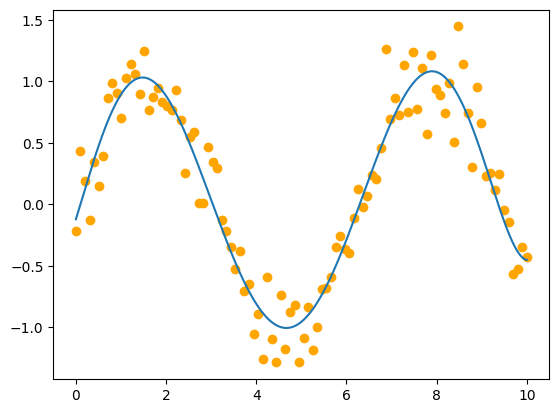

In [21]:
x = np.linspace(0, 10, 1000)
x_poly = polynomial_features.fit_transform(x[:, np.newaxis])
y = model.predict(x_poly)
plt.plot(x, y)
plt.scatter(X, Y, color='orange')


<h2>save model</h2>

In [22]:
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

# Load the model from disk
loaded_model = load(open(filename, 'rb'))

x_poly_test = polynomial_features.fit_transform(X_test)
Y_poly_pred_test = loaded_model.predict(x_poly_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_poly_pred_test))
r2 = r2_score(Y_test, Y_poly_pred_test)

print("deg: {0} RMSE: {1}".format(deg, rmse))
print("deg: {0} R2: {1}".format(deg, r2))


deg: 6 RMSE: 0.2299638530951619
deg: 6 R2: 0.9178944382595464
